# 1. Automated Machine Learning: AutoML

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems. AutoML tends to automate the maximum number of steps in an ML pipeline — with a minimum amount of human effort — without compromising the model’s performance.

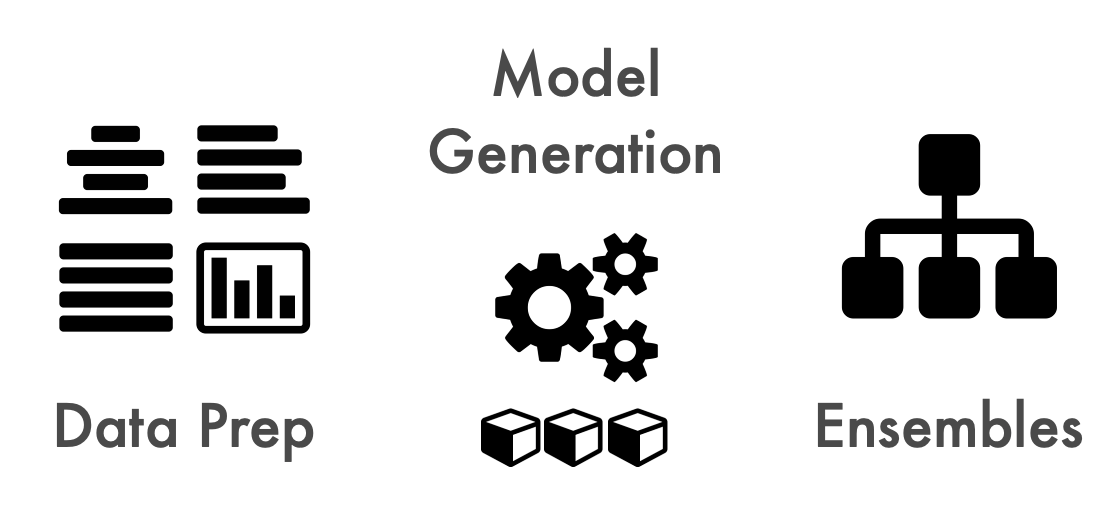

Automated machine learning can be thought of as the standard machine learning process with the automation of some of the steps involved. AutoML very broadly includes:

* Automating certain parts of data preparation, e.g. imputation, standardization, feature selection, etc.
* Being able to generate various models automatically, e.g. random grid search, Bayesian Hyperparameter Optimization, etc.
* Getting the best model out of all the generated models, which most of the time is an Ensemble, e.g. ensemble selection, stacking, etc.




# 2. H2O’s Automatic Machine Learning (AutoML)




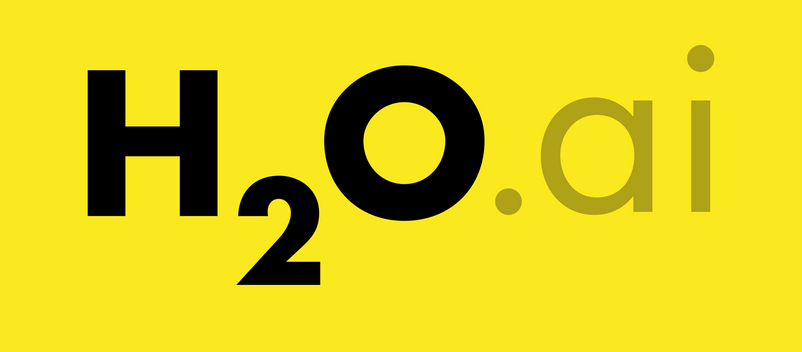


H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.
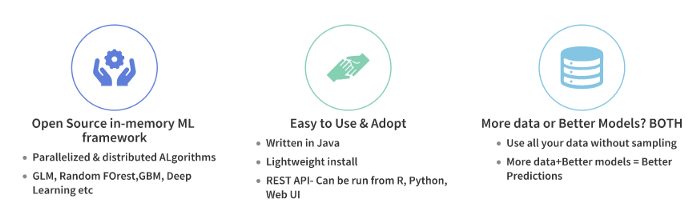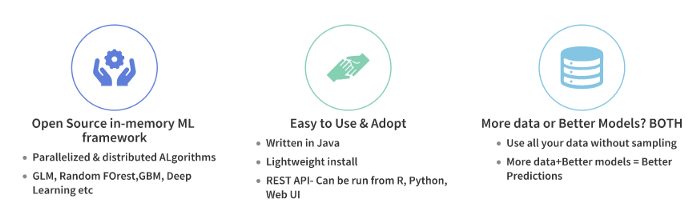




H2O also has an industry-leading AutoML functionality (available in H2O ≥3.14) that automates the process of building a large number of models, to find the “best” model without any prior knowledge or effort by the Data Scientist. H2O AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit.


Some of the important features of H2O’s AutoML are:

* Open-source, distributed (multi-core + multi-node) implementations of cutting edge ML algorithms.
* Availability of core algorithms in high-performance Java. including APIs in R, Python, Scala, web GUI.
* Easily deployable models to production as pure Java code.
* Seamlessly works on Hadoop, Spark, AWS, your laptop, etc.



### Who is it for?
H2O’s AutoML can also be a helpful tool for the novice as well as advanced users. It provides a simple wrapper function that performs a large number of modeling-related tasks that would typically require many lines of code. This essentially frees up the time to focus on other aspects of the data science pipeline, such as data preprocessing, feature engineering, and model deployment.



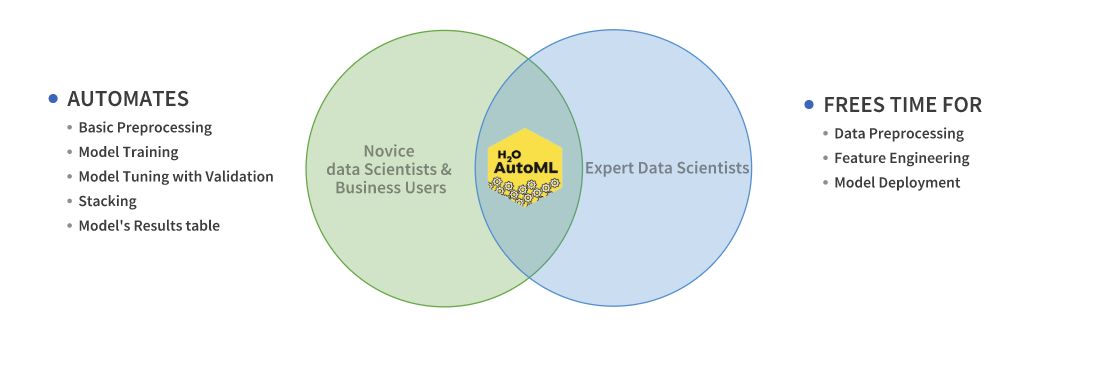

# 3. Case Study

## 1. Start H2O

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprqitb653
  JVM stdout: /tmp/tmprqitb653/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprqitb653/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,3 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_e5755j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


## 2. Loading data into H2O


In [2]:
data_path = "../input/insurance/insurance.csv"
# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
df.head()

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.9
18,male,33.77,1,no,southeast,1725.55
28,male,33,3,no,southeast,4449.46
33,male,22.705,0,no,northwest,21984.5
32,male,28.88,0,no,northwest,3866.86
31,female,25.74,0,no,southeast,3756.62
46,female,33.44,1,no,southeast,8240.59
37,female,27.74,3,no,northwest,7281.51
37,male,29.83,2,no,northeast,6406.41
60,female,25.84,0,no,northwest,28923.1


## 3. Splitting the dataset into train and test datasets

In [4]:
splits = df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

## 4. Specifying the Response and Predictor variables

In [5]:
y = "charges" 
x = df.columns 
x.remove(y) 


## 5. Run AutoML

In [6]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [7]:
lb = aml.leaderboard
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid__1_AutoML_20210703_012849_model_1,1.97322e+07,4442.1,1.97322e+07,2432.87,0.417863
StackedEnsemble_BestOfFamily_AutoML_20210703_012849,1.97639e+07,4445.66,1.97639e+07,2424.24,0.408516
GBM_grid__1_AutoML_20210703_012849_model_4,1.99914e+07,4471.17,1.99914e+07,2520.75,0.415081
GBM_grid__1_AutoML_20210703_012849_model_8,2.00474e+07,4477.43,2.00474e+07,2442.82,0.421568
GBM_grid__1_AutoML_20210703_012849_model_10,2.03408e+07,4510.08,2.03408e+07,2510.67,0.440234
XGBoost_grid__1_AutoML_20210703_012849_model_29,2.05479e+07,4532.98,2.05479e+07,2534.81,0.45648
XGBoost_grid__1_AutoML_20210703_012849_model_28,2.06188e+07,4540.8,2.06188e+07,2533.1,0.442492
XGBoost_grid__1_AutoML_20210703_012849_model_16,2.09987e+07,4582.44,2.09987e+07,2548.82,0.455823
XGBoost_grid__1_AutoML_20210703_012849_model_5,2.10661e+07,4589.78,2.10661e+07,2534.43,0.446389
GBM_grid__1_AutoML_20210703_012849_model_14,2.10932e+07,4592.73,2.10932e+07,2616.26,0.452068


## 6. Ensemble Exploration


In [8]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/opt/conda/lib/python3.7/site-packages/h2o/estimators/stackedensemble.py:836: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


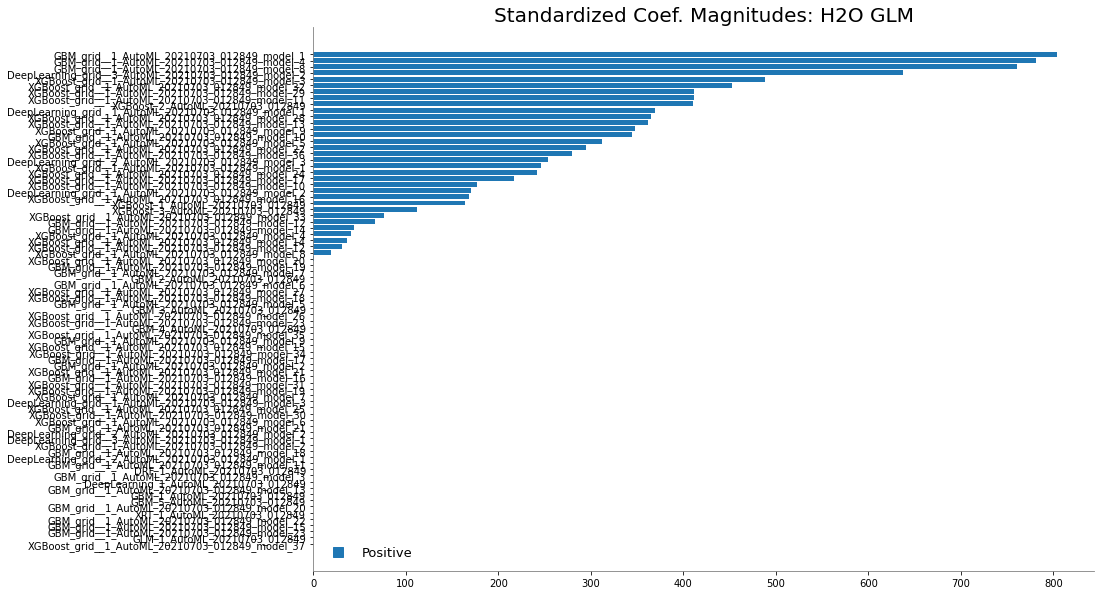

In [9]:
%matplotlib inline
metalearner.std_coef_plot()

## 7. Predicting Using Leader Model


In [10]:
pred = aml.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
5658.43
13037.3
14242.2
2506.73
48810.2
6066.36
48436.8
5409.58
17419.1
12878.9


## 8. Saving the Leader Model


In [11]:
h2o.save_model(aml.leader, path="./Medical_Cost_Personal_model_bin")


'/kaggle/working/product_backorders_model_bin/GBM_grid__1_AutoML_20210703_012849_model_1'

# 4. References

This section provides more resources on the topic if you are looking to go deeper.
* https://www.h2o.ai/hybrid-cloud/explain/
* https://github.com/h2oai/h2o-tutorials
* https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e
* https://www.alibabacloud.com/blog/6-top-automl-frameworks-for-machine-learning-applications-may-2019_595317